**EDA steps**

- 1.read the data

- 2.seperate categorical columns and numerical columns

- 3.data quick checks

    - shape,columns,dtypes and etc

- 4.null value analysis

    - a) check if any null values are present
    
    - b) fill null values with median or knnimputer for numerical columns
    
    - c) fill the null values with mode for categorical columns
    
- 5. do some data preprocessing

    - if any column is correpted
    
    - ex: numerical vales in categorical columns
        
        - or categorical vales in numerical columns
        
- 6. drop the id types columns

    - which means data has more unique labels
    
    - drop the single value columns
    
- 7. categorical column analysis

    - a) frequency table
    
    - b) bar charts
    
    - c) pie charts
    
- 8. numerical column analysis

    - a) histogram
    
    - b) distribution plots
    
    - c) box plot
    
- 9. outlier analysis

    - impute outliers with median
    
- 10. find the correlation between numerical columns

    - heat map
    
- 11. convert categorical to numerical

    - a) labelEncoder
    
    - b) one hot encoder
    
- 12. scale the data

    - a) z standardization
    
    - b) normalization
    
- by the time of 12 steps we achieve 3 things
    
    - 1.cleaned data
    
    - 2.data in the form of complete numerical
    
    - 3.we have some understanding the data
    
- 13. we will try to select important fetures for ml model

    - a) pca: princial component analysis ( will be coverd in ML)
    
- finally we achieve 3 data sets

    - 1. till step-11
        
        - with out scale but data in numerical format
        
    - 2. till step-12 
    
        - with scaling data in numerical format
    
    - 3. till step-13 
        
        - PCA data

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1.read the data**

In [134]:
tele_df=pd.read_csv(r'C:\Users\SONY\Desktop\data science\naresh_it\data_Science\data_files\telecom_churn_data.csv')
tele_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


**2.seperate categorical columns and numerical columns**

In [135]:
tele_df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [136]:
cat=tele_df.select_dtypes(include='object').columns
num=tele_df.select_dtypes(exclude='object').columns

In [137]:
cat

Index(['phone_no', 'gender', 'multi_screen', 'mail_subscribed'], dtype='object')

In [138]:
num

Index(['year', 'customer_id', 'age', 'no_of_days_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

**3.data quick checks**

In [139]:
tele_df.shape

(2000, 16)

In [140]:
tele_df.isnull()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [141]:
tele_df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [142]:
tele_df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [143]:
mode_tele=tele_df['gender'].mode()
mode_tele

0    Male
Name: gender, dtype: object

**4.null value analysis**

In [144]:
tele_df['gender'].isnull().sum()

24

In [145]:
tele_df['gender'].fillna(value='Male',inplace=True)

In [146]:
tele_df['gender'].isnull().sum()

0

In [147]:
median_tele=tele_df['churn'].median()

In [148]:
median_tele

0.0

In [149]:
tele_df['churn'].fillna(value=median_tele,inplace=True)

In [150]:
tele_df['churn'].isnull().sum()

0

In [151]:
tele_df['maximum_days_inactive'].isnull().sum()

28

In [152]:
max_median=tele_df['maximum_days_inactive'].median()

In [153]:
tele_df['maximum_days_inactive'].fillna(value=max_median,inplace=True)

In [154]:
tele_df['maximum_days_inactive'].isnull().sum()

0

In [155]:
tele_df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

**5.if data is correptued do preprocessing**

- no data is correptued here

**6.drop id type columns**

In [156]:
tele_df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


In [157]:
tele_df.drop('customer_id',axis=1,inplace=True)

In [158]:
tele_df.drop('phone_no',axis=1,inplace=True)

In [159]:
tele_df

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,Male,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,Male,40,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


**7.categorical column analysis**

- frequency table

- bar charts

- pie charts

In [160]:
tele_df['gender'].value_counts()

Male      1077
Female     923
Name: gender, dtype: int64

In [161]:
keys=tele_df['gender'].value_counts().keys()

In [162]:
values=tele_df['gender'].value_counts().values

In [163]:
keys

Index(['Male', 'Female'], dtype='object')

In [164]:
values

array([1077,  923], dtype=int64)

<BarContainer object of 2 artists>

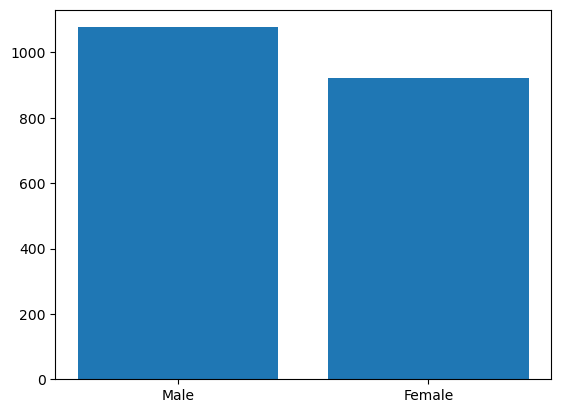

In [165]:
plt.bar(keys,values)

([<matplotlib.patches.Wedge at 0x249c3aefa30>,
 [Text(-0.1327223293818725, 1.091963728007231, 'Male'),
  Text(0.1327223293818726, -1.091963728007231, 'Female')])

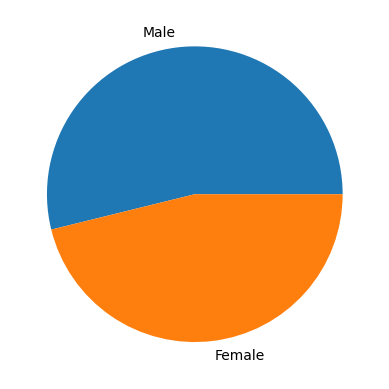

In [166]:
plt.pie(values,labels=keys)

<Axes: xlabel='gender', ylabel='count'>

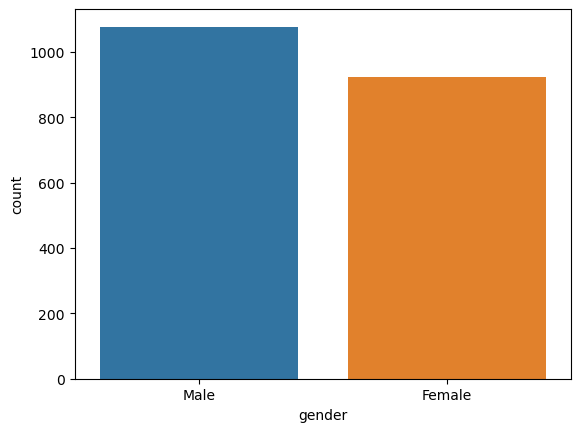

In [167]:
sns.countplot(data=tele_df,x='gender',order=keys)

In [168]:
tele_df['multi_screen'].value_counts()

no     1802
yes     198
Name: multi_screen, dtype: int64

In [169]:
keys1=tele_df['multi_screen'].value_counts().keys()
value1=tele_df['multi_screen'].value_counts().values

<BarContainer object of 2 artists>

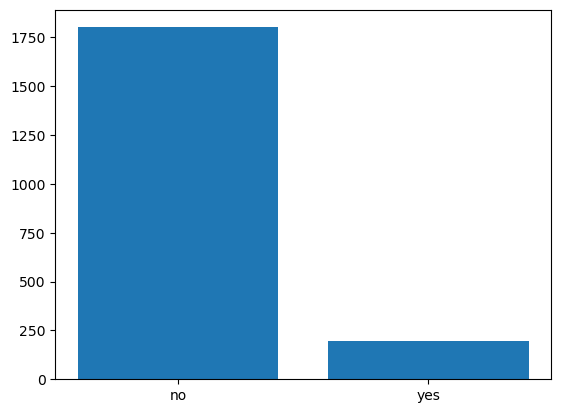

In [170]:
plt.bar(keys1,value1)

([<matplotlib.patches.Wedge at 0x249c39f0700>,
 [Text(-1.0472249138457685, 0.3366303311062784, 'no'),
  Text(1.0472249374839706, -0.3366302575700735, 'yes')])

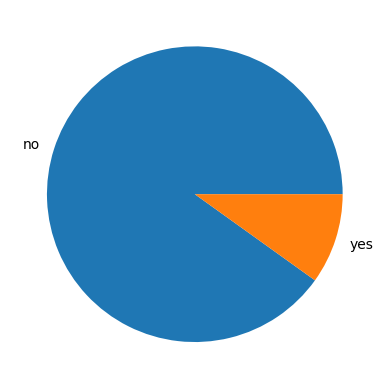

In [171]:
plt.pie(value1,labels=keys1)

<Axes: xlabel='multi_screen', ylabel='count'>

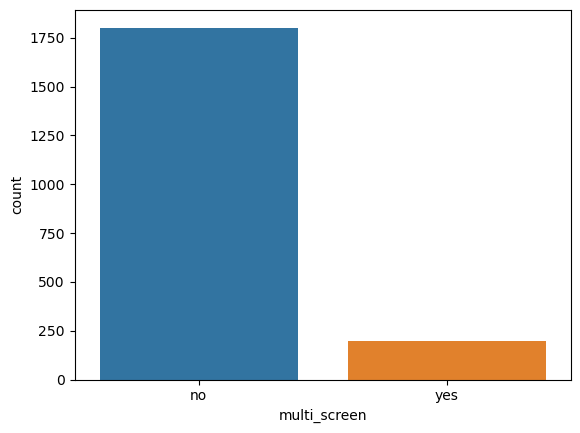

In [172]:
sns.countplot(data=tele_df,x='multi_screen',order=keys1)

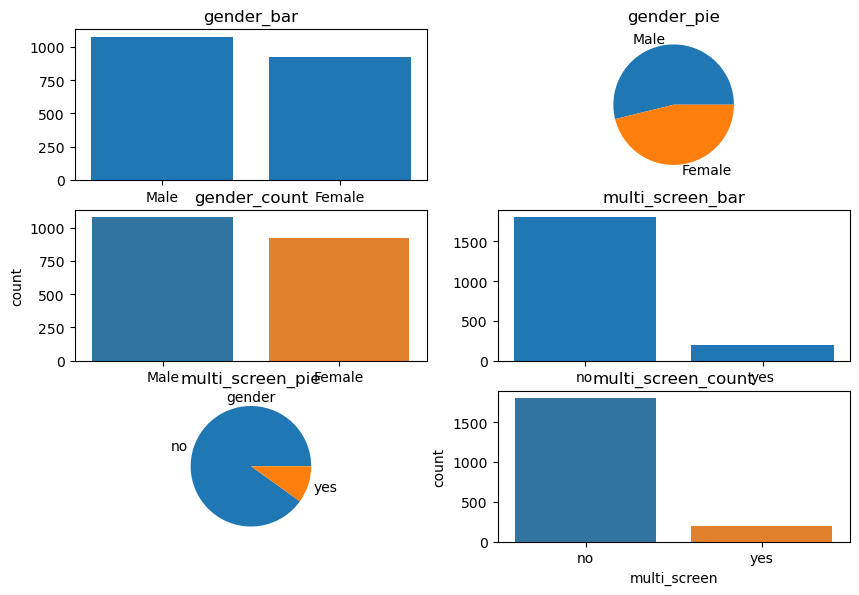

In [173]:
plt.figure(figsize=(10,9))
plt.subplot(4,2,1)
plt.title('gender_bar')
plt.bar(keys,values)
plt.subplot(4,2,2)
plt.title('gender_pie')
plt.pie(values,labels=keys)
plt.subplot(4,2,3)
plt.title('gender_count')
sns.countplot(data=tele_df,x='gender',order=keys)
plt.subplot(4,2,4)
plt.title('multi_screen_bar')
plt.bar(keys1,value1)
plt.subplot(4,2,5)
plt.title('multi_screen_pie')
plt.pie(value1,labels=keys1)
plt.subplot(4,2,6)
plt.title('multi_screen_count')
sns.countplot(data=tele_df,x='multi_screen',order=keys1)
plt.show()

**8.numerical column analysis**

- histogram

- distribution lot

- box plot

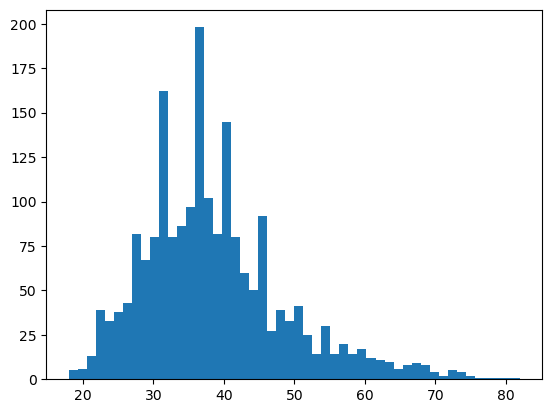

In [174]:
count,intervals,n=plt.hist(tele_df['age'],bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x249c3e27ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x249c3e50040>,
 'boxes': [<matplotlib.lines.Line2D at 0x249c3e27820>],
 'medians': [<matplotlib.lines.Line2D at 0x249c3e50580>],
 'fliers': [<matplotlib.lines.Line2D at 0x249c3e50820>],
 'means': []}

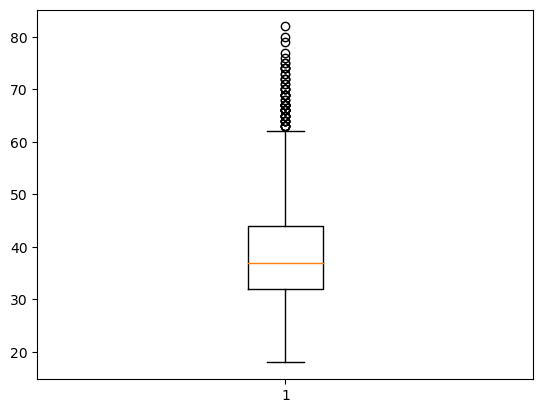

In [175]:
plt.boxplot(tele_df['age'])

In [176]:
tele_df['age'].mean()

38.6905

In [177]:
tele_df['age'].median()

37.0

In [178]:
tele_df['age'].mode()

0    36
Name: age, dtype: int64

In [179]:
tele_df['age'].std()

10.206409513025305

In [180]:
tele_df['age'].min()

18

In [181]:
tele_df['age'].max()

82

In [182]:
len(tele_df['age'])

2000

In [183]:
age=tele_df['age']
np.percentile(age,25)

32.0

In [184]:
age=tele_df['age']
np.percentile(age,50)

37.0

In [185]:
age=tele_df['age']
np.percentile(age,75)

44.0

In [186]:
age=tele_df['age']
np.quantile(age,0.75)

44.0

In [187]:
age=tele_df['age']
np.quantile(age,0.25)

32.0

In [188]:
age=tele_df['age']
np.quantile(age,0.50)

37.0

**9.outlier and non outliers**

In [189]:
len(tele_df['age'])

2000

In [190]:
teledata=tele_df['age']
q1=round(np.quantile(teledata,0.25),2)
q3=round(np.quantile(teledata,0.75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3-1.5*IQR
con1=tele_df['age']<lb
con2=tele_df['age']>ub
con3=con1|con2
n=len(tele_df[con3])
print(f'no of outliers {n}')
outliers_df=tele_df[con3]

no of outliers 1823


In [191]:
teledata=tele_df['age']
q1=round(np.quantile(teledata,0.25),2)
q3=round(np.quantile(teledata,0.75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3-1.5*IQR
con1=tele_df['age']>lb
con2=tele_df['age']<ub
con3=con1|con2
n1=len(tele_df[con3])
print(f'no of non outliers {n1}')
non_outlier_df=tele_df[con3]

no of non outliers 2000


{'whiskers': [<matplotlib.lines.Line2D at 0x249c3fd7a00>,
 'caps': [<matplotlib.lines.Line2D at 0x249c3fd7f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x249c3fd7760>],
 'medians': [<matplotlib.lines.Line2D at 0x249c3e53880>],
 'fliers': [<matplotlib.lines.Line2D at 0x249c3dffc10>],
 'means': []}

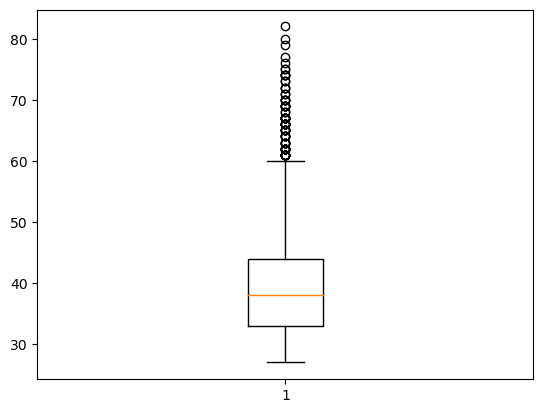

In [192]:
plt.boxplot(outliers_df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x249c405a3b0>,
 'caps': [<matplotlib.lines.Line2D at 0x249c405a8f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249c405a110>],
 'medians': [<matplotlib.lines.Line2D at 0x249c405ae30>],
 'fliers': [<matplotlib.lines.Line2D at 0x249c405b0d0>],
 'means': []}

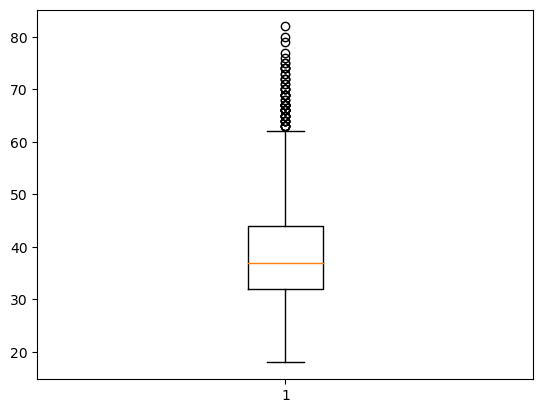

In [193]:
plt.boxplot(non_outlier_df['age'])

(array([391., 461., 469., 208., 132.,  68.,  47.,  29.,  14.,   4.]),
 array([27. , 32.5, 38. , 43.5, 49. , 54.5, 60. , 65.5, 71. , 76.5, 82. ]),
 <BarContainer object of 10 artists>)

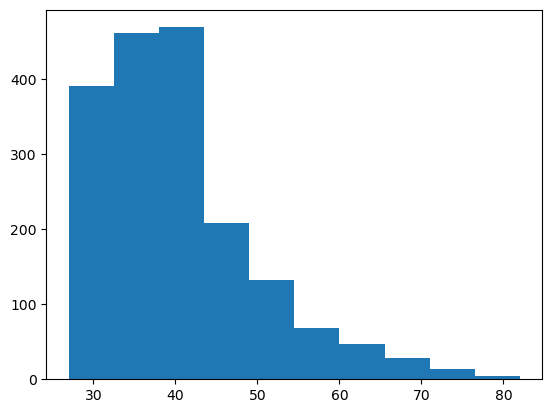

In [194]:
plt.hist(outliers_df['age'])

(array([ 96., 310., 623., 469., 241., 124.,  74.,  41.,  17.,   5.]),
 array([18. , 24.4, 30.8, 37.2, 43.6, 50. , 56.4, 62.8, 69.2, 75.6, 82. ]),
 <BarContainer object of 10 artists>)

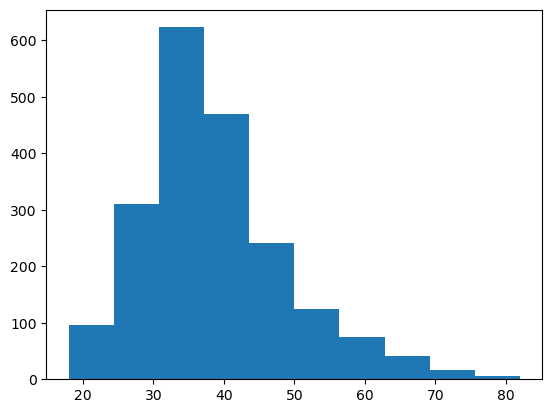

In [195]:
plt.hist(non_outlier_df['age'])

- imputing outliers with median

In [199]:
age_data=tele_df['age']
q1=round(np.quantile(age_data,0.25),2)
q3=round(np.quantile(age_data,0.75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
median=age_data.median()
new_data=[]
for i in age_data:
    if i<lb or i>ub:
        new_data.append(median)
    else:
        new_data.append(i)
tele_df['age']=new_data


In [200]:
con1=tele_df['age']<lb
con2=tele_df['age']>ub
con3=con1|con2
n=len(tele_df[con3])
print(f'no of outliers {n}')
outliers_df=tele_df[con3]

no of outliers 0


**10.correlation between numerical columns**

In [201]:
corr=tele_df.corr(numeric_only=True)
corr

,year,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,0.017936,0.001952,0.019840,0.001965,0.040461,0.014284,0.032164,-0.004074,-0.009296
no_of_days_subscribed,NaN,0.017936,1.000000,0.000657,0.016329,0.000652,-0.001967,0.019414,0.019338,0.013419,0.002517
weekly_mins_watched,NaN,0.001952,0.000657,1.000000,-0.017332,1.000000,0.037715,0.018619,-0.014018,-0.036848,0.162876
minimum_daily_mins,NaN,0.019840,0.016329,-0.017332,1.000000,-0.017330,0.008430,0.050739,0.923740,-0.003943,0.066646
maximum_daily_mins,NaN,0.001965,0.000652,1.000000,-0.017330,1.000000,0.037716,0.018621,-0.014018,-0.036854,0.162874
weekly_max_night_mins,NaN,0.040461,-0.001967,0.037715,0.008430,0.037716,1.000000,-0.000298,0.026565,-0.003965,0.006917
videos_watched,NaN,0.014284,0.019414,0.018619,0.050739,0.018621,-0.000298,1.000000,0.033929,-0.001201,-0.019314
maximum_days_inactive,NaN,0.032164,0.019338,-0.014018,0.923740,-0.014018,0.026565,0.033929,1.000000,-0.001523,0.044778
customer_support_calls,NaN,-0.004074,0.013419,-0.036848,-0.003943,-0.036854,-0.003965,-0.001201,-0.001523,1.000000,0.204774


<Axes: >

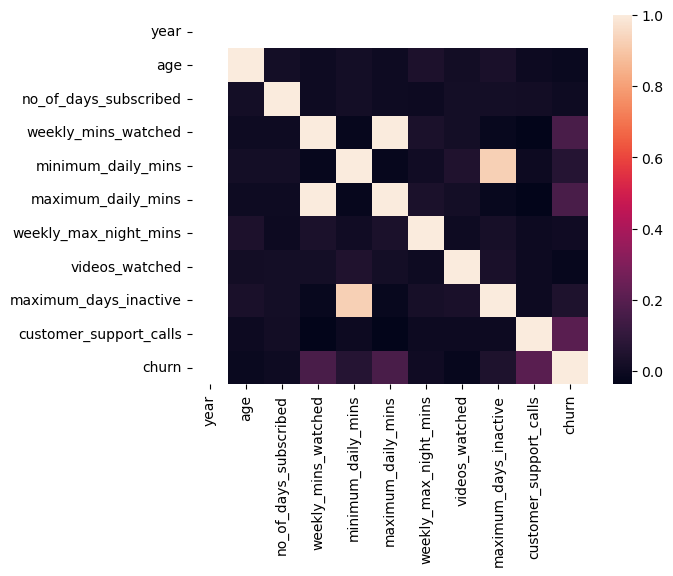

In [202]:
sns.heatmap(corr)

**11.converting categorical columns to numerical columns**

In [203]:
tele_df

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,Female,36.0,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,Female,39.0,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,Female,37.0,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,Female,24.0,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,Female,40.0,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,Female,54.0,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,Male,45.0,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,Male,53.0,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,Male,40.0,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


In [204]:
d={}
labels=tele_df['gender'].unique()
for i in range(len(labels)):
    d[labels[i]]=i
tele_df['gender']=tele_df['gender'].map(d)
tele_df

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,0,36.0,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,0,39.0,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,0,37.0,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,0,24.0,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,0,40.0,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,0,54.0,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,1,45.0,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,1,53.0,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,1,40.0,94,no,no,178.05,10.4,20.18,100,6,3.0,3,0.0


In [205]:
d={}
labels=tele_df['multi_screen'].unique()
for i in range(len(labels)):
    d[labels[i]]=i
tele_df['multi_screen']=tele_df['multi_screen'].map(d)
tele_df

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,0,36.0,62,0,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,0,39.0,149,0,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,0,37.0,126,0,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,0,24.0,131,0,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,0,40.0,191,0,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,0,54.0,75,0,yes,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,1,45.0,127,0,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,1,53.0,94,0,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,1,40.0,94,0,no,178.05,10.4,20.18,100,6,3.0,3,0.0


In [206]:
d={}
labels=tele_df['mail_subscribed'].unique()
for i in range(len(labels)):
    d[labels[i]]=i
tele_df['mail_subscribed']=tele_df['mail_subscribed'].map(d)
tele_df

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,0,36.0,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,0,39.0,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,0,37.0,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,0,24.0,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,0,40.0,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,0,54.0,75,0,1,182.25,11.3,20.66,97,5,4.0,2,0.0
1996,2015,1,45.0,127,0,0,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,1,53.0,94,0,0,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,1,40.0,94,0,0,178.05,10.4,20.18,100,6,3.0,3,0.0


**12.scale the data**

In [210]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
tele_df['age']=ss.fit_transform(tele_df[['age']])
tele_df['age']

0      -0.137921
1       0.248232
2      -0.009203
3      -1.682534
4       0.376950
          ...   
1995    2.178998
1996    1.020539
1997    2.050280
1998    0.376950
1999   -0.009203
Name: age, Length: 2000, dtype: float64